In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import json
import os
import sys
import pandas as pd
import pickle

root_path = os.environ['FCLA_ROOT']
data_path = os.environ['DATA_PATH']
sys.path.append(os.path.join(root_path,'scripts'))

from mergeResults import *

### Definitions

- n - size of network
- m - number of customers
- k - nubmer of facilities
- c - capacity of facilities
- c_min - minimum capacity of facilities requied for feasible solution
- alpha - parameter proportional to density of a graph

## Check Gurobi scalability on fixed relation between customers and graph size

Other parameters are

- relation between customers and facilities (constant)
- relation between capacity of facilities and minimum capacity of facilities that makes a problem feasible, i.e. enouhg to serve all customers

In [57]:
results = load_results(os.path.join(data_path, "geometric", 'n_m-n0.05c-minc2m-k10', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','n_m-n0.05c-minc2m-k10'))
results15 = load_results(os.path.join(data_path, "geometric", 'n_m-n0.15c-minc2m-k10', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','n_m-n0.15c-minc2m-k10'))

In [58]:
results[['id','vcount','objective','source_num','number of facilities',"runtime"]]

,id,vcount,objective,source_num,number of facilities,runtime
0,1488898666208598371,4000.0,13870.0,200.0,20.0,122.848531
1,1488898666123587441,1000.0,7848.0,50.0,5.0,5.377159
2,1488898666256533879,5000.0,15907.0,250.0,25.0,235.690763
3,1488898666142058455,2000.0,10705.0,100.0,10.0,26.826454


In [61]:
results15[['id','vcount','objective','source_num','number of facilities',"runtime",'error']]

,id,vcount,objective,source_num,number of facilities,runtime,error
5,1489255008537228131,1000.0,12873.0,150.0,15.0,17.485865,NaN
4,1489255008555280792,2000.0,17540.0,300.0,30.0,68.069378,NaN
7,1489255008584462505,3000.0,21730.0,450.0,45.0,176.469974,NaN
0,1489255008622307343,4000.0,NaN,600.0,60.0,NaN,graph is not connected
3,1489255008669896112,5000.0,27607.0,750.0,75.0,595.029190,NaN
6,1489255008726915516,6000.0,30062.0,900.0,90.0,1323.355255,NaN
2,1489255008795303478,7000.0,31545.0,1050.0,105.0,1300.260643,NaN
1,1489255008874073958,8000.0,32927.0,1200.0,120.0,2317.462815,NaN
8,1489255008962649591,9000.0,34981.0,1350.0,135.0,3546.999763,NaN
9,148925500961960871,10000.0,37237.0,1500.0,150.0,5601.978475,NaN


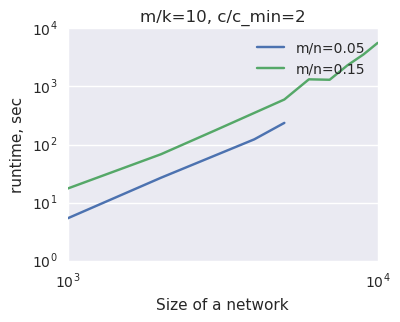

In [64]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
plt.gca().set_yscale("log", nonposx='clip')
plt.gca().set_xscale("log", nonposx='clip')
results = results[results['error'].isnull()]
results15 = results15[results15['error'].isnull()]
results = results.sort_values(by='vcount')
results15 = results15.sort_values(by='vcount')
plt.plot(results['vcount'],results['runtime'],label="m/n=0.05")
plt.plot(results15['vcount'],results15['runtime'],label="m/n=0.15")
plt.xlabel("Size of a network")
plt.ylabel("runtime, sec")
plt.title("m/k=10, c/c_min=2")
plt.legend()

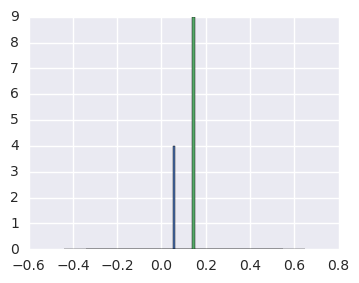

In [68]:
# check m/n relation
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
results['m/n'] = results['source_num']/results['vcount']
results['m/n'].hist(bins=100)
results15['m/n'] = results15['source_num']/results15['vcount']
results15['m/n'].hist(bins=100)

Missing points exist due to sparcity, graph became not-connected

## Gurobi scalability on different graph size

In [36]:
results = load_results(os.path.join(data_path, "geometric", 'n_m100k20c10a2', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','n_m100k20c10a2'))

In [37]:
results

,facility_capacity,id,number of facilities,objective,runtime,error,avg_clustering,avg_degree,avg_dist,ecount,max_degree,max_dist,min_degree,min_dist,source_avg_clust,source_avg_degree,source_num,std_degree,std_dist,vcount
0,10.0,1488890931261352838,20.0,6013.0,1219.372074,NaN,0.590441,12.375732,5461.282453,101382.0,27.0,16383.0,1.0,0.0,0.606389,12.09,100.0,12.844299,2.924683e+07,16384.0
1,10.0,1488890930975212314,20.0,6150.0,1.462794,NaN,0.606732,10.882812,109.532903,1393.0,19.0,255.0,3.0,0.0,0.601430,11.14,100.0,12.251892,3.864110e+03,256.0
2,10.0,1488890931543085327,20.0,6045.0,9007.098881,NaN,0.589431,12.426086,10892.058898,203589.0,26.0,32767.0,1.0,0.0,0.575379,12.43,100.0,12.454070,1.178947e+08,32768.0
3,10.0,1488890930983282677,20.0,6015.0,3.842013,NaN,0.613654,11.363281,188.673771,2909.0,21.0,511.0,2.0,0.0,0.620407,11.42,100.0,13.770370,2.221152e+04,512.0
4,10.0,1488890930996063996,20.0,6408.0,11.400889,NaN,0.606849,11.826172,349.030553,6055.0,22.0,1023.0,1.0,0.0,0.603001,12.00,100.0,14.549862,1.009219e+05,1024.0
5,10.0,148889093333863909,20.0,NaN,NaN,graph is not connected,0.587441,12.493500,43727.686842,818774.0,29.0,131071.0,0.0,0.0,0.587266,12.27,100.0,12.601719,1.901689e+09,131072.0
6,10.0,1488890931118374650,20.0,NaN,NaN,graph is not connected,0.594649,12.364990,2783.516622,50647.0,27.0,8191.0,1.0,0.0,0.619335,11.99,100.0,13.417319,7.428721e+06,8192.0
7,10.0,148889093148598999,20.0,6667.0,86.147343,NaN,0.596662,12.270996,1385.825939,25131.0,25.0,4095.0,1.0,0.0,0.604718,12.07,100.0,13.209276,1.829871e+06,4096.0
8,10.0,148889093114872507,20.0,NaN,NaN,graph is not connected,0.602172,12.067383,693.771358,12357.0,24.0,2047.0,0.0,0.0,0.605025,11.67,100.0,11.698585,4.482006e+05,2048.0


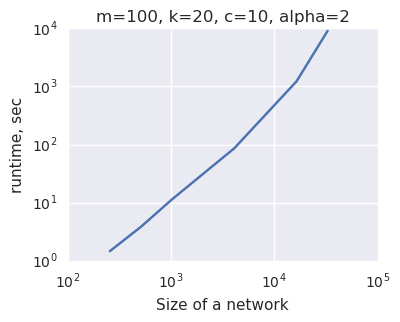

In [40]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
plt.gca().set_yscale("log", nonposx='clip')
plt.gca().set_xscale("log", nonposx='clip')
results = results[results['runtime'].notnull()].sort_values(by='vcount')
plt.plot(results['vcount'],results['runtime'],label="")
plt.xlabel("Size of a network")
plt.ylabel("runtime, sec")
plt.title("m=100, k=20, c=10, alpha=2")

Several graphs turned out to be not connected, but general overview is complete: 32K nodes are processed in 3.5 hours with 100 customers and 20 facilities.

## Gurobi scalability on different capacities of facilities

For this experiment we vary capacities from 8 to 256, but it happened accasionally that we run also up to 1024.

We have 512 customers and 16 facilities, so 32 customer per facility at least.

In [31]:
results = load_results(os.path.join(data_path, "geometric", 'c_n4096m512a2k16', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','c_n4096m512a2k16'))

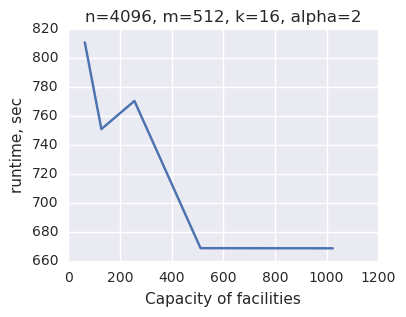

In [34]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
results = results.sort_values(by='facility_capacity')
plt.plot(results['facility_capacity'],results['runtime'],label="")
plt.xlabel("Capacity of facilities")
plt.ylabel("runtime, sec")
plt.title("n=4096, m=512, k=16, alpha=2")
# plt.legend()

In [33]:
results

,facility_capacity,id,number of facilities,objective,runtime,avg_clustering,avg_degree,avg_dist,ecount,max_degree,...,network_diam,source_avg_clust,source_avg_degree,source_avg_dist,source_avg_eccentricity,source_num,source_std_dist,std_degree,std_dist,vcount
0,128.0,1488895982754236676,16.0,46860.0,750.994267,0.595751,12.372559,1359.886604,25339.0,30.0,...,1415.0,0.599068,12.40625,541.356478,1085.205078,512.0,64100.214067,15.081415,1.778580e+06,4096.0
1,1024.0,1488895982754236676,16.0,46860.0,668.966711,0.595751,12.372559,1359.886604,25339.0,30.0,...,1415.0,0.599068,12.40625,541.356478,1085.205078,512.0,64100.214067,15.081415,1.778580e+06,4096.0
2,256.0,1488895982754236676,16.0,46860.0,770.378748,0.595751,12.372559,1359.886604,25339.0,30.0,...,1415.0,0.599068,12.40625,541.356478,1085.205078,512.0,64100.214067,15.081415,1.778580e+06,4096.0
3,64.0,1488895982754236676,16.0,46860.0,810.664174,0.595751,12.372559,1359.886604,25339.0,30.0,...,1415.0,0.599068,12.40625,541.356478,1085.205078,512.0,64100.214067,15.081415,1.778580e+06,4096.0
4,512.0,1488895982754236676,16.0,46860.0,669.065921,0.595751,12.372559,1359.886604,25339.0,30.0,...,1415.0,0.599068,12.40625,541.356478,1085.205078,512.0,64100.214067,15.081415,1.778580e+06,4096.0


The point for capacities = 32 (min available) did not terminate in 3 days.

## Gurobi scalability on different facility numbers

We have 512 customers and capacity of 64, so we need at least 8 facilities and 512 will make a problem trivial

In [42]:
results = load_results(os.path.join(data_path, "geometric", 'k_n4096m512c64a2', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','k_n4096m512c64a2'))

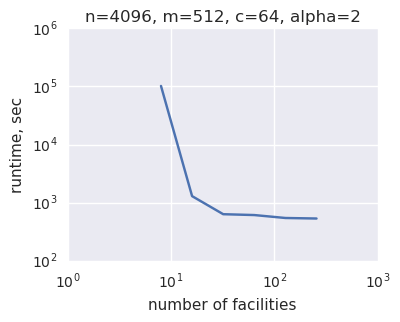

In [43]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
plt.gca().set_yscale("log", nonposx='clip')
plt.gca().set_xscale("log", nonposx='clip')
results = results.sort_values(by='number of facilities')
plt.plot(results['number of facilities'],results['runtime'],label="")
plt.xlabel("number of facilities")
plt.ylabel("runtime, sec")
plt.title("n=4096, m=512, c=64, alpha=2")
# plt.legend()

In [44]:
results

,facility_capacity,id,number of facilities,objective,runtime,avg_clustering,avg_degree,avg_dist,ecount,max_degree,...,network_diam,source_avg_clust,source_avg_degree,source_avg_dist,source_avg_eccentricity,source_num,source_std_dist,std_degree,std_dist,vcount
2,64.0,1488894763720524546,8.0,69988.0,101801.554449,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0
4,64.0,1488894763720524546,16.0,47565.0,1294.392113,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0
0,64.0,1488894763720524546,32.0,31031.0,632.733585,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0
5,64.0,1488894763720524546,64.0,19479.0,611.697367,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0
3,64.0,1488894763720524546,128.0,11081.0,544.516839,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0
1,64.0,1488894763720524546,256.0,4928.0,533.265117,0.595207,12.232422,1367.341636,25052.0,26.0,...,1426.0,0.59308,12.480469,534.478481,1074.386719,512.0,63311.2285,12.946957,1.816950e+06,4096.0


Note, that for 8 facilities it takes about 3 hours to process 512 customers.

## Gurobi scalability on different number of customers

Here we run 8 facilities with 128 capacity on various cusotmers in a graph with 4096 nodes

m_n1000k20c10a2/1488893247670406634.ntw did not terminate in 5 days with 1024 customers

In [74]:
results = load_results(os.path.join(data_path, "geometric", 'm_n4096k16c64a2', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','m_n4096k16c64a2'))

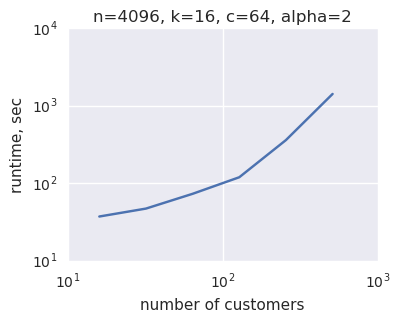

In [76]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
plt.gca().set_yscale("log", nonposx='clip')
plt.gca().set_xscale("log", nonposx='clip')
results = results.sort_values(by='source_num')
plt.plot(results['source_num'],results['runtime'],label="")
plt.xlabel("number of customers")
plt.ylabel("runtime, sec")
plt.title("n=4096, k=16, c=64, alpha=2")

## Gurobi scalability on graph density

Graph density is defined by parameter alpha, that is max distance between connected nodes (alpha*sqrt(N))

1488896765716165488.ntw did not terminate in 5 days, with average degree = 136, but density only 2 (??)

In [79]:
results = load_results(os.path.join(data_path, "geometric", 'a_n2048c16k32m256', "solutions", "gurobi"), 
                       os.path.join(data_path,'geometric','a_n2048c16k32m256'))

In [80]:
results

,facility_capacity,id,number of facilities,objective,runtime,error,avg_clustering,avg_degree,avg_dist,ecount,max_degree,max_dist,min_degree,min_dist,source_avg_clust,source_avg_degree,source_num,std_degree,std_dist,vcount
0,16.0,1489399105616995159,32.0,13308.0,102.237795,NaN,0.625924,71.575195,693.709940,73293.0,104.0,2047.0,18.0,0.0,0.629902,72.070312,256.0,218.518760,408941.541241,2048.0
1,16.0,1489399105522562575,32.0,13309.0,97.401305,NaN,0.622388,58.837891,691.579823,60250.0,88.0,2047.0,16.0,0.0,0.624660,59.574219,256.0,155.312588,413465.694306,2048.0
2,16.0,1489399105728313582,32.0,13308.0,98.593141,NaN,0.629959,85.757812,696.273139,87816.0,124.0,2047.0,21.0,0.0,0.632593,86.242188,256.0,310.808533,404315.566060,2048.0
3,16.0,1489399105443545320,32.0,13312.0,98.778276,NaN,0.617558,46.934570,689.950556,48061.0,74.0,2047.0,12.0,0.0,0.620573,47.578125,256.0,106.121696,418602.494389,2048.0
4,16.0,1489399105378805858,32.0,13330.0,98.444470,NaN,0.613535,36.345703,687.784361,37218.0,59.0,2047.0,9.0,0.0,0.616786,37.082031,256.0,69.822872,423772.051400,2048.0
5,16.0,1489399105284357674,32.0,13442.0,95.832516,NaN,0.605995,19.040039,683.706741,19497.0,34.0,2047.0,4.0,0.0,0.605969,19.367188,256.0,27.643905,433985.949270,2048.0
6,16.0,1489399105252662276,32.0,13914.0,102.210257,NaN,0.602014,12.282227,679.367337,12577.0,26.0,2047.0,2.0,0.0,0.595208,12.558594,256.0,15.695739,438207.790324,2048.0
7,16.0,1489399105227066246,32.0,NaN,NaN,graph is not connected,0.589832,6.948242,671.374092,7115.0,17.0,2047.0,0.0,0.0,0.570423,7.085938,256.0,7.953376,440260.444688,2048.0
8,16.0,1489399105858333704,32.0,13308.0,99.598997,NaN,0.633817,100.772461,698.141760,103191.0,147.0,2047.0,23.0,0.0,0.637851,100.851562,256.0,432.993148,399435.402447,2048.0
9,16.0,1489399105326635889,32.0,13362.0,97.884505,NaN,0.609749,26.928711,685.543741,27575.0,44.0,2047.0,8.0,0.0,0.608480,27.625000,256.0,44.461715,427299.384188,2048.0


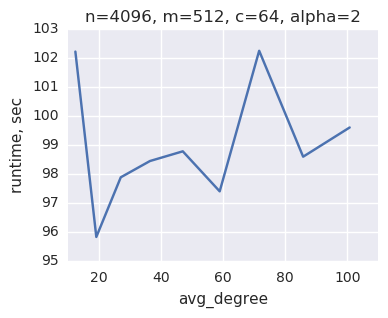

In [81]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
results = results.sort_values(by='avg_degree')
plt.plot(results['avg_degree'],results['runtime'],label="")
plt.xlabel("avg_degree")
plt.ylabel("runtime, sec")
plt.title("n=4096, m=512, c=64, alpha=2")

Runtime slightly increases, but actual customer/degree distributions are more significant